In [458]:
import scipy.io as io
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

sns.set_style('whitegrid')

%matplotlib inline

## Set parameters of the model and visualize it

In [413]:
D = 6 # size of RF
T = 1000 # number of time steps
dt = 0.01 # size of time step in s
R = 50 # firing rate in Hz

In [414]:
k = np.zeros((D,D))

# subunits
k1 = k.copy()
k1[2,2:4] = 1
k1 = k1.flatten()

k2 = k.copy()
k2[3,2:4] = 1
k2=w2.flatten()

w = np.array([.5, .5])

# linear receptive field 
ks = np.concatenate((k1[:,np.newaxis],k2[:,np.newaxis]),axis=1) 
k = ks @ w

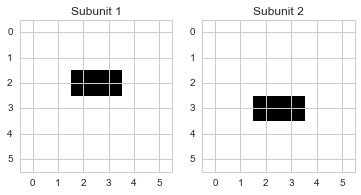

In [418]:
plt.subplot(1,2,1)
plt.imshow(k1.reshape(D,D),interpolation='nearest')
plt.title('Subunit 1')

plt.subplot(1,2,2)
plt.imshow(k2.reshape(D,D),interpolation='nearest')
plt.title('Subunit 2')

## Simulate responses to Gaussian noise

In [403]:
# create stimulus
np.random.seed(0)
s = np.random.normal(0,1,(D**2,T))

In [404]:
#generate responses
rs = np.exp(ks.transpose() @ s) * dt * R 
r = w.transpose() @ rs

np.random.seed(10000)
sp = np.random.poisson(r) 

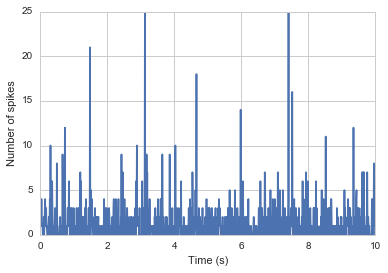

In [423]:
t = np.arange(0,T) * dt;
plt.plot(t,sp)
plt.xlabel('Time (s)')
plt.ylabel('Number of spikes')

## Finding subunits

In [425]:
ste = np.zeros((s.shape[0],0))
for i,n in enumerate(sp):
    if n>0:
        ss = s[:,i]
        tmp = np.kron(np.ones((1,n)),ss[:,np.newaxis])
        ste = np.concatenate((ste,tmp),axis=1)
        
ste.shape

sta = np.mean(ste,axis=1)
    

In [448]:
k_means = KMeans(n_clusters=2)
k_means.fit(ste.transpose())

k1_est = k_means.cluster_centers_[0,:]
k2_est = k_means.cluster_centers_[1,:]


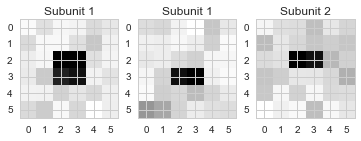

In [449]:
plt.subplot(1,3,1)
plt.imshow(sta.reshape(D,D),interpolation='nearest')
plt.title('Subunit 1')

plt.subplot(1,3,2)
plt.imshow(k1_est.reshape(D,D),interpolation='nearest')
plt.title('Subunit 1')

plt.subplot(1,3,3)
plt.imshow(k2_est.reshape(D,D),interpolation='nearest')
plt.title('Subunit 2')


In [468]:
g_mm = GMM(n_components=2,covariance_type='diag')
g_mm.fit(ste.transpose())

k1_est = g_mm.means_[0,:]
k2_est = g_mm.means_[1,:]


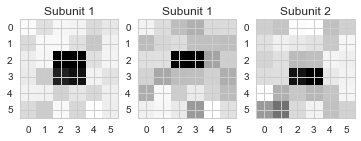

In [467]:
plt.subplot(1,3,1)
plt.imshow(sta.reshape(D,D),interpolation='nearest')
plt.title('Subunit 1')

plt.subplot(1,3,2)
plt.imshow(k1_est.reshape(D,D),interpolation='nearest')
plt.title('Subunit 1')

plt.subplot(1,3,3)
plt.imshow(k2_est.reshape(D,D),interpolation='nearest')
plt.title('Subunit 2')


 ## Iterative algorithm by Shlens et al.
 
 For some reason, this does not work - rather, the algorithm walks away even from the correct solution. I guess something must be wrong.

In [ ]:
#for i in range(1,1000):
tmp = w[:,np.newaxis] * (np.exp(ks_est.transpose() @ s))

alpha = tmp/np.sum(tmp,axis=0)

ks_est = (s @ alpha.transpose()) / np.sum(alpha,axis=1)

w_est = np.sum(alpha,axis=1) / T * np.exp(-.5 * np.linalg.norm(ks_est,axis=0)**2)  